In [1]:
from deepCR import deepCR
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
import numpy as np
import os
import gc

# DeepCR Quickstart

In [2]:
data_dir = os.environ.get('DEEPCR_DIR')
!ls $data_dir

demo             flc_test         flc_test_backup  flc_train_backup


In [3]:
image1 = fits.getdata(data_dir + 'demo/jdba2sooq_flc.fits')
print(image1.shape)
image = image1[:256,:256]
print(image.shape)

(2048, 4096)
(256, 256)


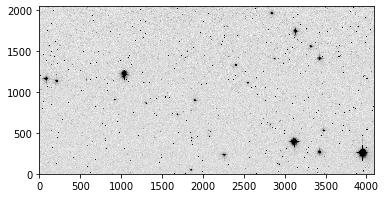

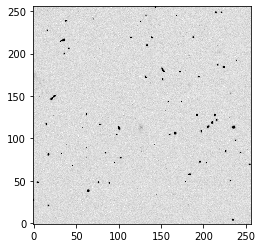

In [4]:
plt.imshow(image1, cmap = 'gray_r', vmin = 0, vmax = 250, origin='lower')
plt.show()
plt.imshow(image, cmap = 'gray_r', vmin = 0, vmax = 250, origin= 'lower')
plt.show()
image2 = image1[500-256:500,3000:3256]

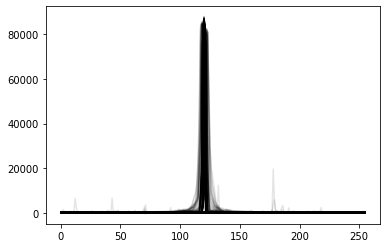

In [5]:
for row in image2:
    plt.plot(np.arange(len(row)), row, alpha = 0.1, c = 'k')

In [6]:
mdl = deepCR(mask="ACS-WFC-F606W-2-32",
             inpaint="ACS-WFC-F606W-2-32",
             device="CPU")

In [7]:
mask, cleaned_image = mdl.clean(image, threshold = 0.5)
mask2, cleaned_image2 = mdl.clean(image2, threshold = 0.5)
mask3, cleaned_image3 = mdl.clean(image2, threshold = 1e-8)
# mask = mdl.clean(image, threshold = 0.5, inpaint = False)
# prob_mask = mdl.clean(image, binary=False)
# mask, cleaned_image = mdl.clean(image, threshold = 0.5, n_jobs=-1)
# mask, cleaned_image = mdl.clean(image, threshold = 0.5, inpaint = False, segment = True)

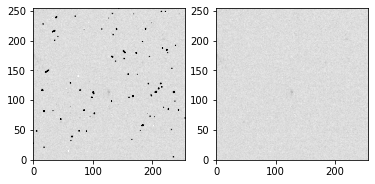

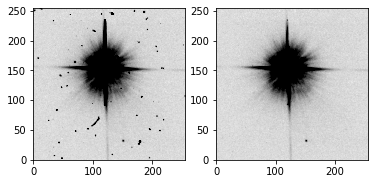

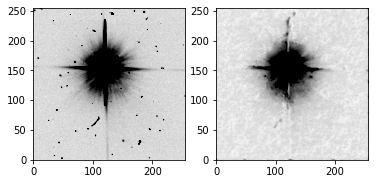

In [8]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(image, cmap = 'gray_r', vmin = 0, vmax = 250, origin = 'lower')
axs[1].imshow(cleaned_image, cmap = 'gray_r', vmin = 0, vmax = 250, origin = 'lower')
fig, axs = plt.subplots(1,2)
axs[0].imshow(image2, cmap = 'gray_r', vmin = 0, vmax = 250, origin = 'lower')
axs[1].imshow(cleaned_image2, cmap = 'gray_r', vmin = 0, vmax = 250, origin = 'lower')
fig, axs = plt.subplots(1,2)
axs[0].imshow(image2, cmap = 'gray_r', vmin = 0, vmax = 250, origin = 'lower')
axs[1].imshow(cleaned_image3, cmap = 'gray_r', vmin = 0, vmax = 250, origin = 'lower')

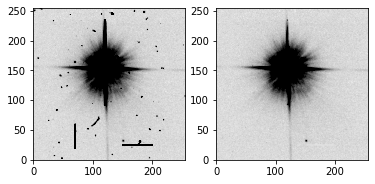

In [9]:
custom = image2.copy()
custom[20:60,70]= 60000
custom[25,150:200] = 50000
mask, custom_clean = mdl.clean(custom, threshold = 0.5)
fig, axs = plt.subplots(1,2)
axs[0].imshow(custom, vmin = 0, vmax = 250, cmap = 'gray_r', origin = 'lower')
axs[1].imshow(custom_clean, vmin = 0, vmax = 250, cmap = 'gray_r', origin = 'lower')

# Training

## CR mask

In [2]:
import glob as glob
import shutil
from astropy.io import ascii

from astropy.table import Table
from astropy.visualization import ZScaleInterval
from astroquery.mast import Observations
from ccdproc import ImageFileCollection
from drizzlepac import tweakreg
from drizzlepac import astrodrizzle
from IPython.display import Image

%matplotlib inline

The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol


trTable = Observations.query_criteria(obstype='all',
                                      obs_collection='HST',
                                      obs_id = ['j97001010','j97005010',
                                               'j97007010','jbit11010',
                                               'j9l907010','j9l908010',
                                               'j8z003010','j8z004010',
                                               'j8z006010','j8z008010',
                                               'j9el32020'])
tsTable = Observations.query_criteria(obstype='all',
                                      obs_collection='HST',
                                      obs_id = ['jcoz44010','j9l906010',
                                               'j9l909010','j90o28050'])

tr_product = Observations.get_product_list(trTable)
ts_product = Observations.get_product_list(tsTable)

Observations.download_products(tr_product,
                              download_dir = '/Users/jameskwon/Documents/Research/Data/deepcr/training_flc_set',
                              mrp_only = False,
                              productSubGroupDescription='FLC')
Observations.download_products(ts_product,
                              download_dir = '/Users/jameskwon/Documents/Research/Data/deepcr/test_flc_set',
                              mrp_only = False,
                              productSubGroupDescription='FLC')

In [3]:
tr_path = os.environ.get('DEEPCR_DIR')+'flc_train/'
ts_path = tr_path.replace('flc_train','flc_test')

In [4]:
from drizzlepac import astrodrizzle

In [19]:
path = ts_path+str(13671)+'/44/*flc.fits'
astrodrizzle.AstroDrizzle(path)

Setting up logfile :  astrodrizzle.log
AstroDrizzle Version 3.1.6 (2020-02-19 16:16:30 -0500) started at: 17:25:28.563 (03/06/2020)

==== Processing Step  Initialization  started at  17:25:28.56 (03/06/2020)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 349.1752570733827  12.781655972661175  
CRPIX : 2114.5  2178.5  
CD1_1 CD1_2  : 1.2296487966474292e-06  1.3834348499470613e-05  
CD2_1 CD2_2  : 1.3834348499470613e-05  -1.2296487966474292e-06  
NAXIS : 4229  4357
********************************************************************************
*
*  Estimated memory usage:  up to 1649 Mb.
*  Output image size:       4229 X 4357 pixels. 
*  Output image file:       ~ 210 Mb. 
*  Cores available:         6
*
********************************************************************************
==== Processing Step Initialization finished at 17:25:30.05 (03/06/2020)
==== Processing Step  Static Mask  started at  17:25:30.054 (03/06/2020)

==== Processing Step Static

Writing out image to disk: /Users/jameskwon/Documents/Research/Data/deepcr/flc_test/13671/44/jcoz44jmq_sci2_blt.fits
    Blot: creating blotted image:  /Users/jameskwon/Documents/Research/Data/deepcr/flc_test/13671/44/jcoz44joq_flc.fits[sci,1]
Using default C-based coordinate transformation...
-Generating simple FITS output: /Users/jameskwon/Documents/Research/Data/deepcr/flc_test/13671/44/jcoz44joq_sci1_blt.fits
Writing out image to disk: /Users/jameskwon/Documents/Research/Data/deepcr/flc_test/13671/44/jcoz44joq_sci1_blt.fits
    Blot: creating blotted image:  /Users/jameskwon/Documents/Research/Data/deepcr/flc_test/13671/44/jcoz44joq_flc.fits[sci,2]
Using default C-based coordinate transformation...
-Generating simple FITS output: /Users/jameskwon/Documents/Research/Data/deepcr/flc_test/13671/44/jcoz44joq_sci2_blt.fits
Writing out image to disk: /Users/jameskwon/Documents/Research/Data/deepcr/flc_test/13671/44/jcoz44joq_sci2_blt.fits
==== Processing Step Blot finished at 17:25:55.06

## Bad Pixel Masks and Saturation Masks

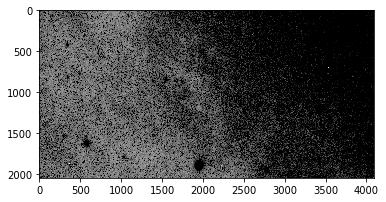

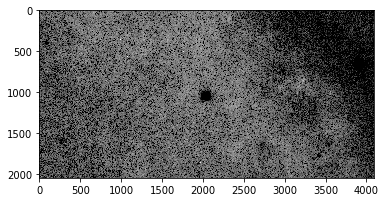

In [14]:
example_path = tr_path+str(10260)+'/3/j8z003g3q_flc.fits'
with fits.open(example_path) as hdul:
#     print(hdul.info())
    plt.imshow(hdul[1].data, cmap = 'gray_r', vmin = 0, vmax = 250)
    plt.show()
    plt.imshow(hdul[4].data, cmap = 'gray_r', vmin = 0, vmax = 250)
    plt.show()

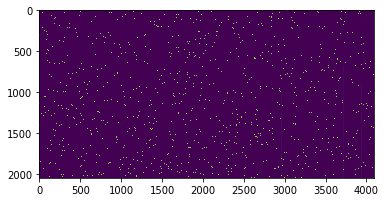

In [9]:
example_path = tr_path+str(12213)+'/11/jbit11dsq_flc.fits'
with fits.open(example_path) as hdul:
#     print(hdul.info())
    hdr = hdul[0].header
#     print(repr(hdr))
    dq = hdul[3].data
    sat = hdul[1].data > 70000
plt.imshow(dq)

In [7]:
tr_prop_ID = [10420,12213,10775,10260,10584]

img_pair = {}
for i,ID in enumerate(tr_prop_ID):
    print(f'{i+1}/{len(tr_prop_ID)}', end = '\r')
    parent_path = f'{tr_path}{ID}'
    n_vis = !ls $parent_path
    for n in n_vis:
        fits_path = f'{parent_path}/{n}'
        fits_files = !ls $fits_path
        for file in fits_files:
            if '_crmask.fits' not in file:
                with fits.open(f'{fits_path}/{file}') as hdul:
                    dq = hdul[3].data
                    img = hdul[1].data
                    sat = img > 70000
                    
                    img2 = hdul[4].data
                    sat2 = img2> 70000
                    dq2 = hdul[6].data

                f_crmask = file.replace('_flc.fits','_sci1_crmask.fits')
                f_crmask2 = file.replace('_flc.fits','_sci2_crmask.fits')
                crmask = fits.getdata(f'{fits_path}/{f_crmask}')
                crmask2 = fits.getdata(f'{fits_path}/{f_crmask2}')
                img_pair[f'{file}_1'] = (img,crmask,dq | sat)
                img_pair[f'{file}_2'] = (img2,crmask2,dq2 | sat2)
                del dq, img, sat,crmask, dq2, img2, sat2, crmask2
np.save('img_pair.npy',img_pair)

## Train

In [55]:
img_pair = np.load('img_pair.npy', allow_pickle = True)[()]

length = 256

subimg_pair = {}
for i,pair in enumerate(img_pair.items()):
    print(f'{i+1}/{len(img_pair)}', end = '\r')
    f_name, val = pair
    img, mask, ignore = val
    y, x = img.shape
    y /= length
    x /= length
    idx = 0
    for yy in range(int(y)):
        for xx in range(int(x)):
            sub_img = img[length*(yy):length*(yy+1),length*(xx):length*(xx+1)]
            sub_mask = mask[length*(yy):length*(yy+1),length*(xx):length*(xx+1)]
            sub_ignore = ignore[length*(yy):length*(yy+1),length*(xx):length*(xx+1)]
            subimg_pair[f'{f_name}_{idx}'] = sub_img,sub_mask,sub_ignore
            idx += 1
np.save('subimg_pair.npy',subimg_pair)

In [3]:
subimg_pair = np.load('subimg_pair.npy',allow_pickle = True)[()]

In [2]:
from deepCR import train

In [4]:
images = []#np.array([])
masks = []#np.array([])
ignores = []#np.array([])
for value in subimg_pair.values():
    img, mask, ignore = value
    images.append(img)
    masks.append(mask)
    ignores.append(ignore)

In [5]:
images = np.array(images)
masks = np.array(masks)
ignores = np.array(ignores)

print(images.shape)
print(masks.shape)
print(ignores.shape)

(9984, 256, 256)
(9984, 256, 256)
(9984, 256, 256)


In [6]:
trainer = train(images, masks, ignore=ignores, name='model_1',gpu = True, epoch=50,
                save_after=20, plot_every=10, use_tqdm=False)
trainer.train()
filename = trainer.save()

RuntimeError: Cannot initialize CUDA without ATen_cuda library. PyTorch splits its backend into two shared libraries: a CPU library and a CUDA library; this error has occurred because you are trying to use some CUDA functionality, but the CUDA library has not been loaded by the dynamic linker for some reason.  The CUDA library MUST be loaded, EVEN IF you don't directly use any symbols from the CUDA library! One common culprit is a lack of -Wl,--no-as-needed in your link arguments; many dynamic linkers will delete dynamic library dependencies if you don't depend on any of their symbols.  You can check if this has occurred by using ldd on your binary to see if there is a dependency on *_cuda.so library.

In [14]:
torch.cuda.is_available()

False